In [11]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline


We'll continue to make use of the fuel economy dataset in this workspace.

In [12]:
fuel_econ = pd.read_csv('fuel-econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **Task 1**: 
Plot the distribution of combined fuel mileage (column 'comb', in miles per gallon) by manufacturer (column 'make'), for all manufacturers with at least eighty cars in the dataset. Consider which manufacturer order will convey the most information when constructing your final plot. 

**Hint**: Completing this exercise will take multiple steps! Add additional code cells as needed in order to achieve the goal.

In [77]:
ct_counts = fuel_econ.groupby(['comb', 'make']).size()
ct_counts

comb     make   
12.8217  Bentley    1
12.8633  Ferrari    4
12.8889  Bentley    3
13.0996  Ferrari    4
13.3117  Bentley    1
                   ..
54.4329  Toyota     2
54.5772  Hyundai    1
54.6019  Hyundai    1
55.7000  Toyota     3
57.7824  Hyundai    2
Length: 2225, dtype: int64

In [78]:
ct_counts = ct_counts.reset_index(name='count')

In [79]:
ct_counts

,comb,make,count
0,12.8217,Bentley,1
1,12.8633,Ferrari,4
2,12.8889,Bentley,3
3,13.0996,Ferrari,4
4,13.3117,Bentley,1
...,...,...,...
2220,54.4329,Toyota,2
2221,54.5772,Hyundai,1
2222,54.6019,Hyundai,1
2223,55.7000,Toyota,3


In [80]:
counts = ct_counts['make'].value_counts()

In [81]:
counts

make
BMW                  246
Mercedes-Benz        180
Ford                 137
Chevrolet            125
Volkswagen           125
Hyundai              118
Audi                  97
Porsche               96
Kia                   87
MINI                  83
Honda                 82
Cadillac              79
Infiniti              77
Toyota                77
Mazda                 71
Lexus                 65
Nissan                48
Subaru                42
Dodge                 38
Jaguar                38
Lincoln               38
Buick                 35
Volvo                 32
Acura                 29
Mitsubishi            24
Scion                 21
Maserati              20
Chrysler              19
Bentley               16
Genesis               13
Suzuki                13
Ferrari               10
Rolls-Royce           10
Roush Performance      9
Fiat                   9
Lotus                  7
Aston Martin           5
Alfa Romeo             3
Karma                  1
Name: count, dtype: 

In [82]:
ct_counts['count'] = ct_counts['make'].isin(counts[counts >= 80].index)
ct_counts

,comb,make,count
0,12.8217,Bentley,False
1,12.8633,Ferrari,False
2,12.8889,Bentley,False
3,13.0996,Ferrari,False
4,13.3117,Bentley,False
...,...,...,...
2220,54.4329,Toyota,False
2221,54.5772,Hyundai,True
2222,54.6019,Hyundai,True
2223,55.7000,Toyota,False


In [85]:
ct_counts.drop(ct_counts[(ct_counts['count'] == False)].index, inplace=True)

In [86]:
ct_counts

,comb,make,count
10,13.8580,Chevrolet,True
14,13.9055,Chevrolet,True
17,13.9976,Mercedes-Benz,True
21,14.1408,Chevrolet,True
24,14.2712,Mercedes-Benz,True
...,...,...,...
2208,47.6804,Honda,True
2219,52.3231,Hyundai,True
2221,54.5772,Hyundai,True
2222,54.6019,Hyundai,True


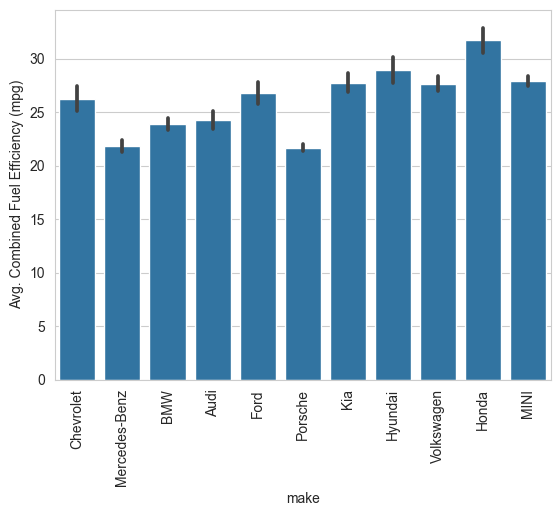

In [107]:
base_color = sb.color_palette()[0]
sb.barplot(data=ct_counts, x='make', y='comb', color=base_color);
plt.xticks(rotation=90);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

### **Task 2**: 
Continuing on from the previous task, plot the mean fuel efficiency for each manufacturer with at least 80 cars in the dataset.  Can you use error bars?

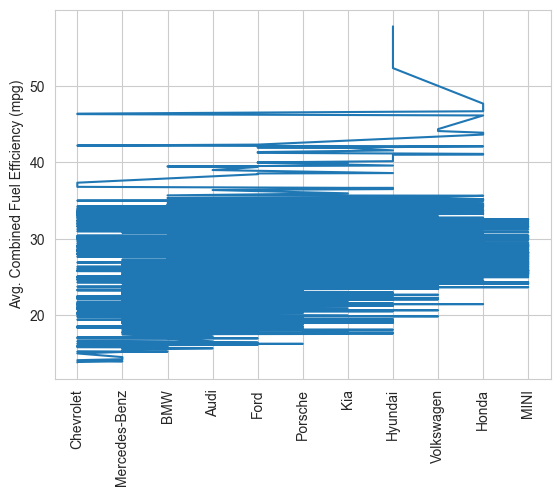

In [108]:
plt.errorbar(data=ct_counts, x='make', y='comb')
plt.xticks(rotation=90);
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');